# E-commerce Business Analytics Dashboard

**Business Intelligence Report**  
*Comprehensive analysis of e-commerce performance metrics*

---

## Table of Contents

1. [Business Objectives & Configuration](#business-objectives)
2. [Data Dictionary & Overview](#data-dictionary)
3. [Data Loading & Preparation](#data-loading)
4. [Revenue Performance Analysis](#revenue-analysis)
5. [Product Performance Analysis](#product-analysis)
6. [Geographic Performance Analysis](#geographic-analysis)
7. [Customer Experience Analysis](#customer-experience)
8. [Operational Metrics](#operational-metrics)
9. [Executive Summary](#executive-summary)

---

## 1. Business Objectives & Configuration {#business-objectives}

This analysis focuses on understanding business performance across multiple dimensions:

**Key Business Questions:**
- How did revenue perform in the target period compared to the previous period?
- What are the month-over-month growth trends?
- Which product categories drive the most revenue?
- How does performance vary by geographic region?
- What is the relationship between delivery speed and customer satisfaction?

**Analysis Configuration:**
Configure your analysis parameters below:

In [23]:
# Analysis Configuration
TARGET_YEAR = 2023  # Primary year for analysis
COMPARISON_YEAR = 2022  # Comparison year for growth analysis
DATA_PATH = "ecommerce_data/"  # Path to data files

# Optional: Filter by specific months (None for full year)
TARGET_START_MONTH = None  # 1-12, None for full year
TARGET_END_MONTH = None    # 1-12, None for full year

print(f"Analysis Configuration:")
print(f"Target Period: {TARGET_YEAR}")
print(f"Comparison Period: {COMPARISON_YEAR}")
if TARGET_START_MONTH and TARGET_END_MONTH:
    print(f"Month Range: {TARGET_START_MONTH} to {TARGET_END_MONTH}")
else:
    print(f"Month Range: Full Year")

Analysis Configuration:
Target Period: 2023
Comparison Period: 2022
Month Range: Full Year


## 2. Data Dictionary & Overview {#data-dictionary}

**Dataset Overview:**

| Dataset | Description | Key Fields |
|---------|-------------|------------|
| **Orders** | Order transactions and status | order_id, customer_id, order_status, timestamps |
| **Order Items** | Individual items within orders | order_id, product_id, price, freight_value |
| **Products** | Product catalog information | product_id, category_name, dimensions |
| **Customers** | Customer demographics | customer_id, state, city, zip_code |
| **Reviews** | Customer feedback and ratings | order_id, review_score, comments |

**Key Business Metrics:**
- **Revenue**: Total sales value from delivered orders
- **Average Order Value (AOV)**: Average revenue per order
- **Customer Satisfaction**: Average review score (1-5 scale)
- **Delivery Performance**: Days from purchase to delivery
- **Order Status Distribution**: Percentage of orders by status

## 3. Data Loading & Preparation {#data-loading}

Loading and preprocessing all e-commerce datasets with proper data types and validation.

In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Import custom modules
from data_loader import EcommerceDataLoader, load_and_prepare_data
from business_metrics import EcommerceMetrics, MetricsVisualizer, generate_executive_summary

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

print("Libraries loaded successfully")

Libraries loaded successfully


In [25]:
# Load and prepare all datasets
print("Loading e-commerce datasets...")
print("="*50)

sales_data, datasets = load_and_prepare_data(
    data_path=DATA_PATH,
    target_year=TARGET_YEAR,
    comparison_year=COMPARISON_YEAR
)

print("\nData loading completed successfully!")

Loading e-commerce datasets...
Loaded orders: (10000, 8)
Loaded order_items: (16047, 7)
Loaded products: (6000, 9)
Loaded customers: (8000, 5)
Loaded reviews: (6571, 7)
Loaded payments: (14091, 5)

Data Summary:
Total sales records: 16,047
Delivered orders: 15,095
Records for 2023: 7,448
Records for 2022: 7,641

Data loading completed successfully!


In [26]:
# Create data loader instance for filtering
loader = EcommerceDataLoader(DATA_PATH)

# Filter data for target and comparison periods
target_data = loader.filter_by_date_range(
    sales_data, 'order_purchase_timestamp',
    start_year=TARGET_YEAR, end_year=TARGET_YEAR,
    start_month=TARGET_START_MONTH, end_month=TARGET_END_MONTH
)

comparison_data = loader.filter_by_date_range(
    sales_data, 'order_purchase_timestamp',
    start_year=COMPARISON_YEAR, end_year=COMPARISON_YEAR,
    start_month=TARGET_START_MONTH, end_month=TARGET_END_MONTH
)

print(f"Dataset Filtering Results:")
print(f"Target period ({TARGET_YEAR}): {len(target_data):,} records")
print(f"Comparison period ({COMPARISON_YEAR}): {len(comparison_data):,} records")
print(f"\nData Quality Check:")
print(f"Target period revenue: ${target_data['price'].sum():,.2f}")
print(f"Target period orders: {target_data['order_id'].nunique():,}")

Dataset Filtering Results:
Target period (2023): 7,448 records
Comparison period (2022): 7,641 records

Data Quality Check:
Target period revenue: $3,360,294.74
Target period orders: 4,635


## 4. Revenue Performance Analysis {#revenue-analysis}

Comprehensive analysis of revenue performance including year-over-year comparison and monthly trends.

In [27]:
# Calculate comprehensive revenue metrics
metrics = EcommerceMetrics()
revenue_metrics = metrics.calculate_revenue_metrics(
    target_data, comparison_data, 
    current_period=str(TARGET_YEAR),
    comparison_period=str(COMPARISON_YEAR)
)

# Display key revenue metrics
print("REVENUE PERFORMANCE METRICS")
print("="*50)
print(f"\n{TARGET_YEAR} Performance:")
print(f"Total Revenue: ${revenue_metrics[f'{TARGET_YEAR}_total_revenue']:,.2f}")
print(f"Total Orders: {revenue_metrics[f'{TARGET_YEAR}_total_orders']:,}")
print(f"Average Order Value: ${revenue_metrics[f'{TARGET_YEAR}_avg_order_value']:.2f}")
print(f"Total Items Sold: {revenue_metrics[f'{TARGET_YEAR}_total_items']:,}")

print(f"\nYear-over-Year Growth vs {COMPARISON_YEAR}:")
print(f"Revenue Growth: {revenue_metrics['revenue_growth_rate']:+.2f}%")
print(f"Order Growth: {revenue_metrics['order_growth_rate']:+.2f}%")
print(f"AOV Growth: {revenue_metrics['aov_growth_rate']:+.2f}%")

REVENUE PERFORMANCE METRICS

2023 Performance:
Total Revenue: $3,360,294.74
Total Orders: 4,635
Average Order Value: $724.98
Total Items Sold: 7,448

Year-over-Year Growth vs 2022:
Revenue Growth: -2.46%
Order Growth: -2.40%
AOV Growth: -0.06%


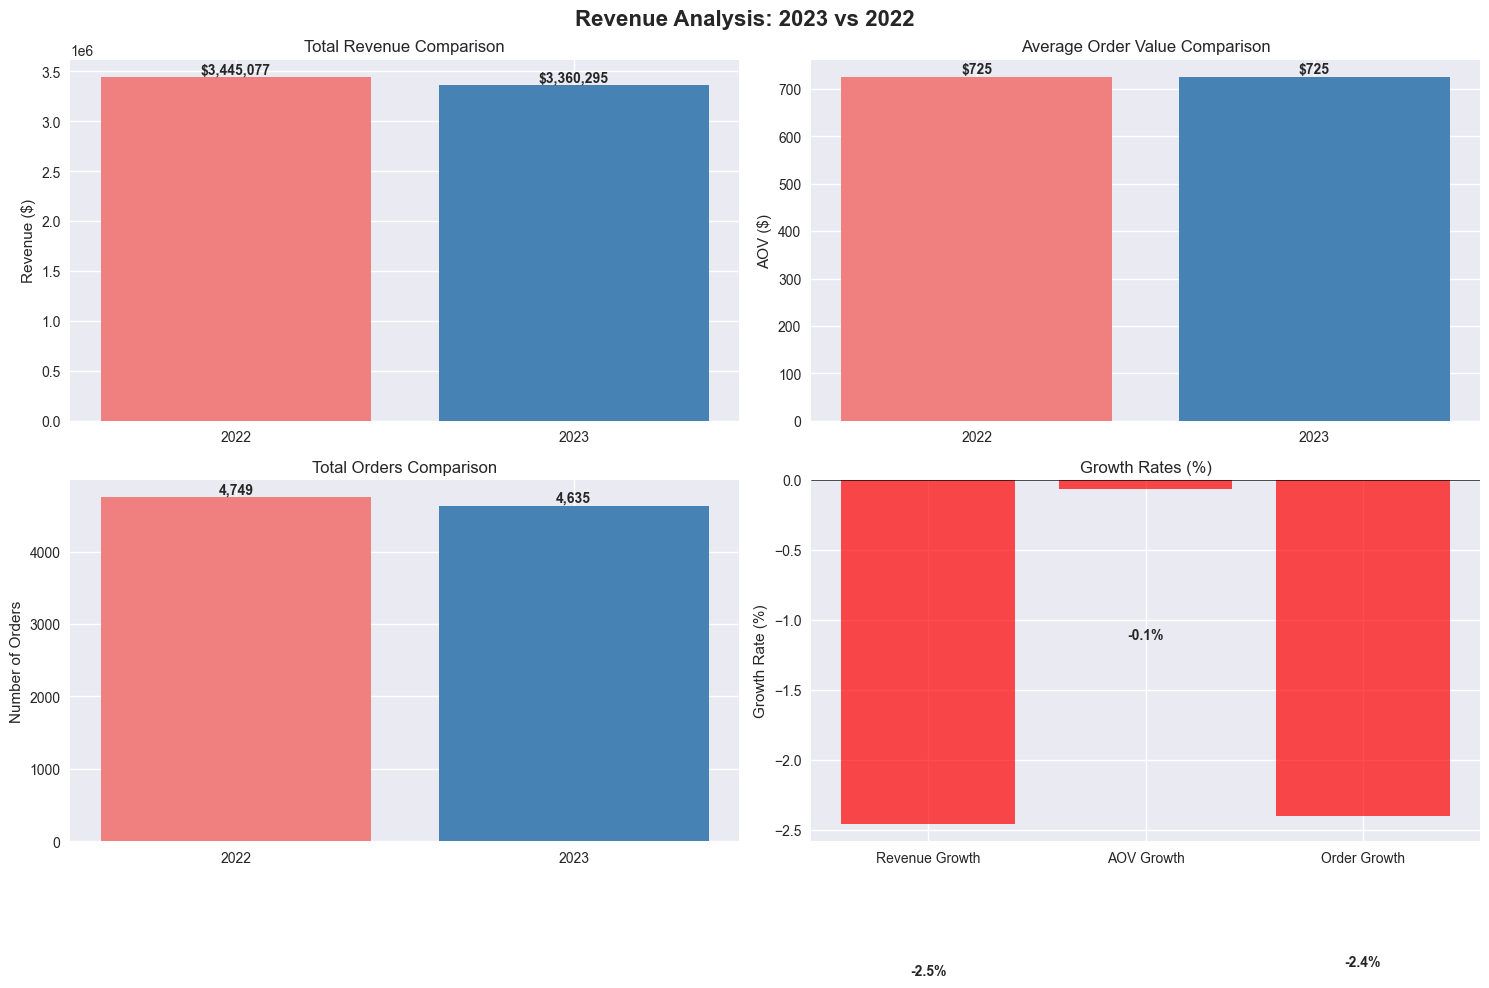

In [28]:
# Create revenue comparison visualization
visualizer = MetricsVisualizer()
revenue_fig = visualizer.plot_revenue_comparison(
    revenue_metrics, str(TARGET_YEAR), str(COMPARISON_YEAR)
)

plt.show()
plt.close()

In [29]:
# Calculate and visualize monthly trends
monthly_trends = metrics.calculate_monthly_trends(target_data, TARGET_YEAR)

print("MONTHLY TRENDS ANALYSIS")
print("="*50)
print(f"\nMonthly Revenue Summary for {TARGET_YEAR}:")
print(monthly_trends[['month', 'revenue', 'orders', 'avg_order_value']].round(2))

print(f"\nAverage Monthly Growth Rates:")
print(f"Revenue Growth: {monthly_trends['revenue_growth'].mean():.2f}%")
print(f"Order Growth: {monthly_trends['order_growth'].mean():.2f}%")
print(f"AOV Growth: {monthly_trends['aov_growth'].mean():.2f}%")

MONTHLY TRENDS ANALYSIS

Monthly Revenue Summary for 2023:
    month    revenue  orders  avg_order_value
0       1  284855.48     384           741.81
1       2  276758.54     384           720.73
2       3  285618.77     394           724.92
3       4  253794.62     370           685.93
4       5  301347.96     396           760.98
5       6  289126.72     406           712.13
6       7  296209.39     392           755.64
7       8  286645.60     375           764.39
8       9  303793.15     384           791.13
9      10  259890.15     379           685.73
10     11  259518.93     384           675.83
11     12  262735.43     387           678.90

Average Monthly Growth Rates:
Revenue Growth: -0.39%
Order Growth: 0.13%
AOV Growth: -0.61%


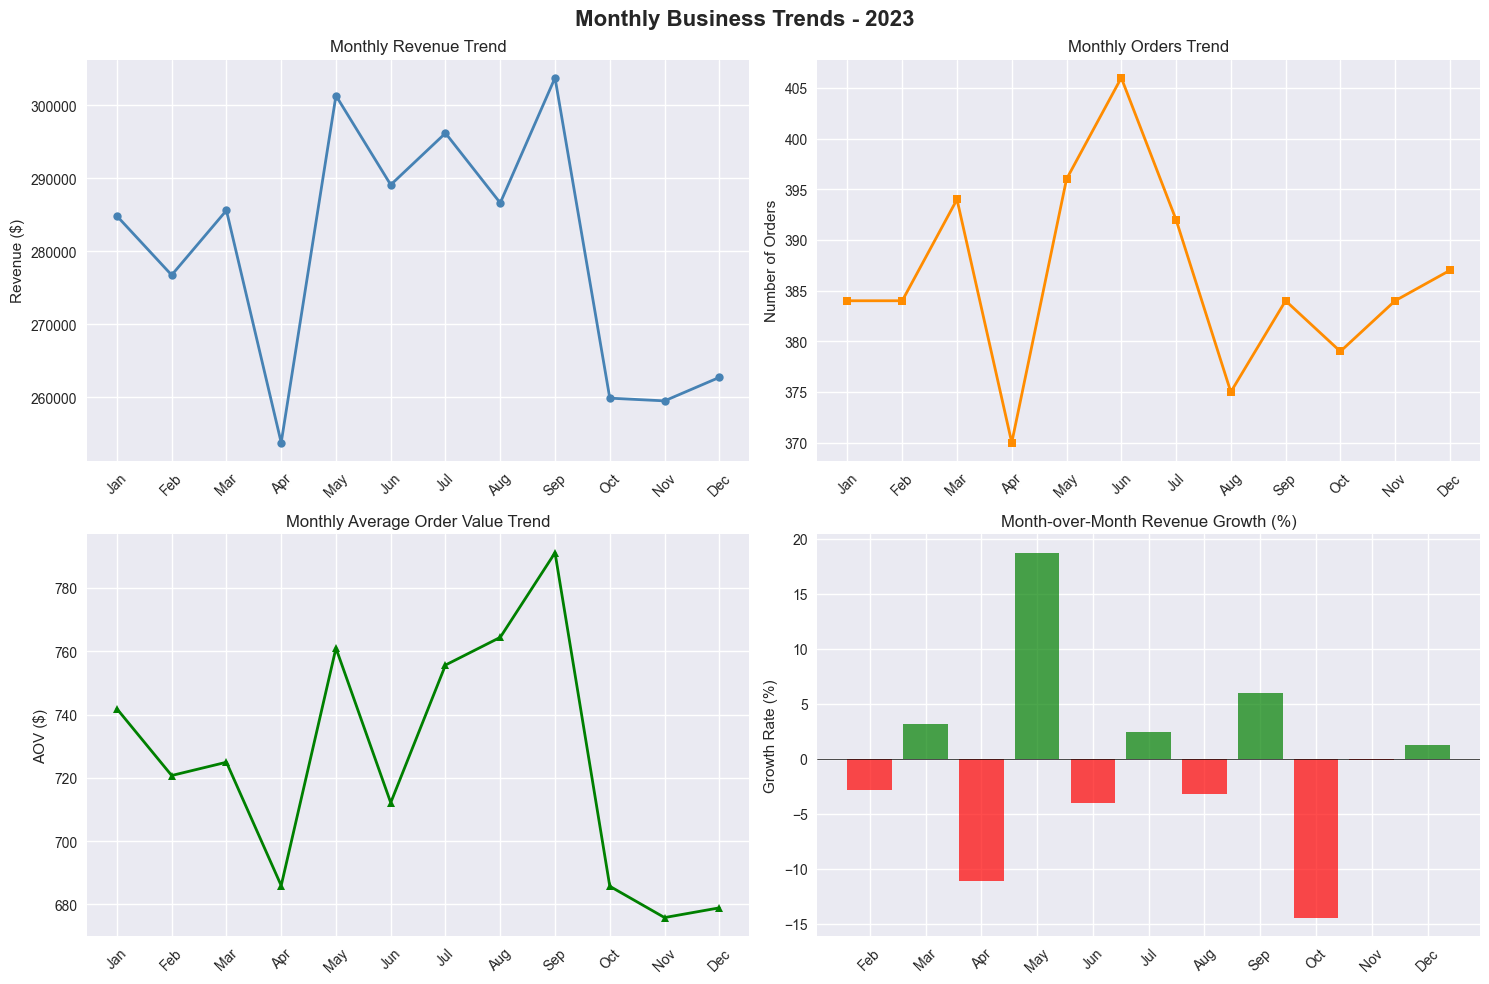

In [30]:
# Create monthly trends visualization
trends_fig = visualizer.plot_monthly_trends(monthly_trends, TARGET_YEAR)
plt.show()
plt.close()

## 5. Product Performance Analysis {#product-analysis}

Analysis of product categories and individual product performance to identify top revenue drivers.

In [31]:
# Analyze product performance
product_analysis = metrics.analyze_product_performance(
    target_data, datasets['products'], top_n=13
)

category_performance = product_analysis['category_performance']
product_performance = product_analysis['product_performance']

print("PRODUCT CATEGORY PERFORMANCE")
print("="*50)
print(f"\nTop Product Categories by Revenue ({TARGET_YEAR}):")
print(category_performance.head(10))

print(f"\nCategory Performance Summary:")
print(f"Total Categories: {len(category_performance)}")
print(f"Top Category Revenue: ${category_performance.iloc[0]['total_revenue']:,.2f}")
print(f"Top Category: {category_performance.iloc[0]['product_category_name']}")

PRODUCT CATEGORY PERFORMANCE

Top Product Categories by Revenue (2023):
    product_category_name  total_revenue  avg_price  items_sold  unique_orders
0             electronics     1401359.21    1056.04        1327           1227
1             home_garden      862653.27     750.79        1149           1045
2         sports_outdoors      278845.32     406.48         686            645
3              automotive      247707.10     506.56         489            473
4  clothing_shoes_jewelry      232745.04     263.29         884            828
5              toys_games       70163.64     147.40         476            461
6    health_personal_care       65370.27     103.76         630            613
7  tools_home_improvement       54280.33     247.86         219            213
8    beauty_personal_care       49213.30     156.23         315            309
9             books_media       38559.08      53.18         725            687

Category Performance Summary:
Total Categories: 13
Top Cat

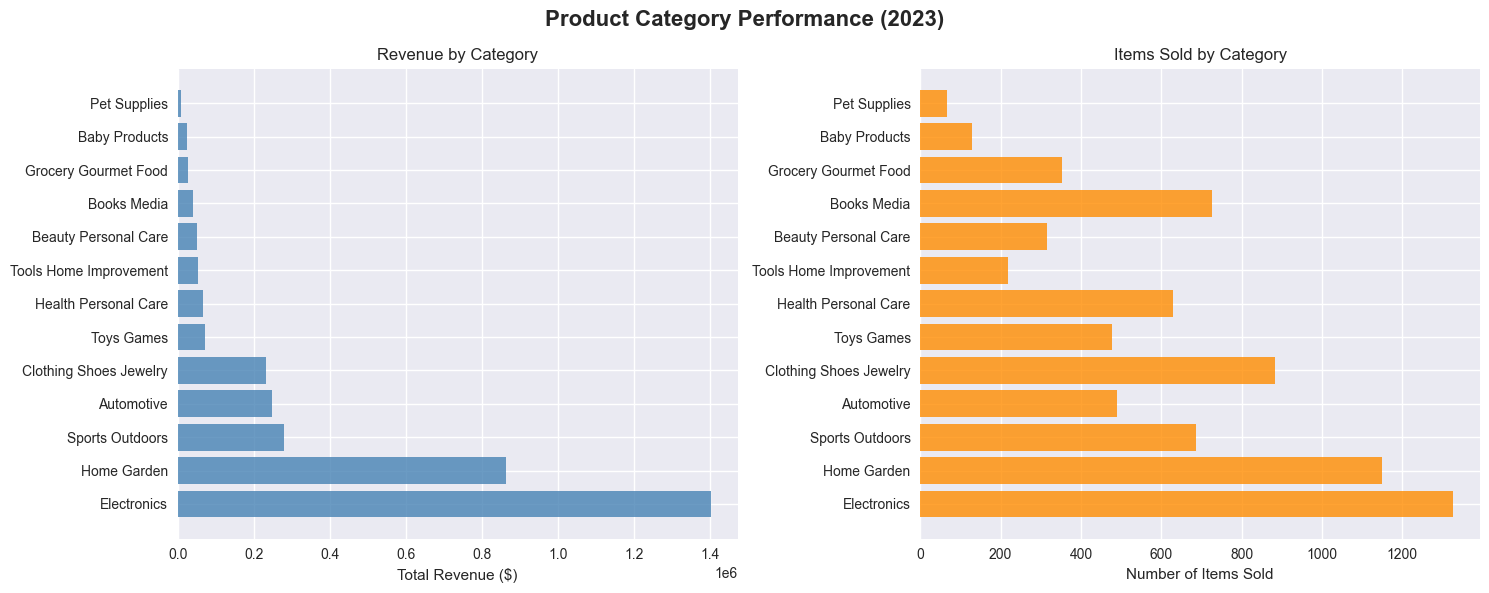

In [32]:
# Create product category performance visualization
category_fig = visualizer.plot_category_performance(
    category_performance, f"({TARGET_YEAR})"
)
plt.show()
plt.close()

In [33]:
# Create interactive category performance chart
categories_clean = category_performance['product_category_name'].str.replace('_', ' ').str.title()

fig = px.bar(
    x=category_performance['total_revenue'],
    y=categories_clean,
    orientation='h',
    title=f'Product Category Revenue Performance ({TARGET_YEAR})',
    labels={'x': 'Total Revenue ($)', 'y': 'Product Category'},
    color=category_performance['total_revenue'],
    color_continuous_scale='Blues'
)

fig.update_layout(
    height=600,
    title_font_size=16,
    title_x=0.5
)

fig.show()

## 6. Geographic Performance Analysis {#geographic-analysis}

Analysis of sales performance across different states to identify regional opportunities and trends.

In [34]:
# Analyze geographic performance
geo_performance = metrics.analyze_geographic_performance(
    target_data, datasets['orders'], datasets['customers']
)

print("GEOGRAPHIC PERFORMANCE ANALYSIS")
print("="*50)
print(f"\nTop 15 States by Revenue ({TARGET_YEAR}):")
print(geo_performance.head(15))

print(f"\nGeographic Summary:")
print(f"Total States: {len(geo_performance)}")
print(f"Top State: {geo_performance.iloc[0]['customer_state']}")
print(f"Top State Revenue: ${geo_performance.iloc[0]['total_revenue']:,.2f}")
print(f"Top State AOV: ${geo_performance.iloc[0]['avg_order_value']:.2f}")

GEOGRAPHIC PERFORMANCE ANALYSIS

Top 15 States by Revenue (2023):
   customer_state  total_revenue  avg_order_value  total_orders  unique_customers
0              CA      537880.74           438.73          1226               582
1              TX      403303.49           464.10           869               438
2              FL      310195.84           438.75           707               332
3              NY      253111.85           400.49           632               286
4              IL      185930.89           460.22           404               190
5              PA      173260.68           493.62           351               172
6              OH      157619.72           464.95           339               151
7              GA      146414.65           478.48           306               145
8              MI      132325.60           405.91           326               164
9              NC      128314.74           444.00           289               135
10             NJ      127437.56

In [35]:
# Create interactive geographic visualization
geo_map = visualizer.create_geographic_map(geo_performance, f"({TARGET_YEAR})")
geo_map.show()

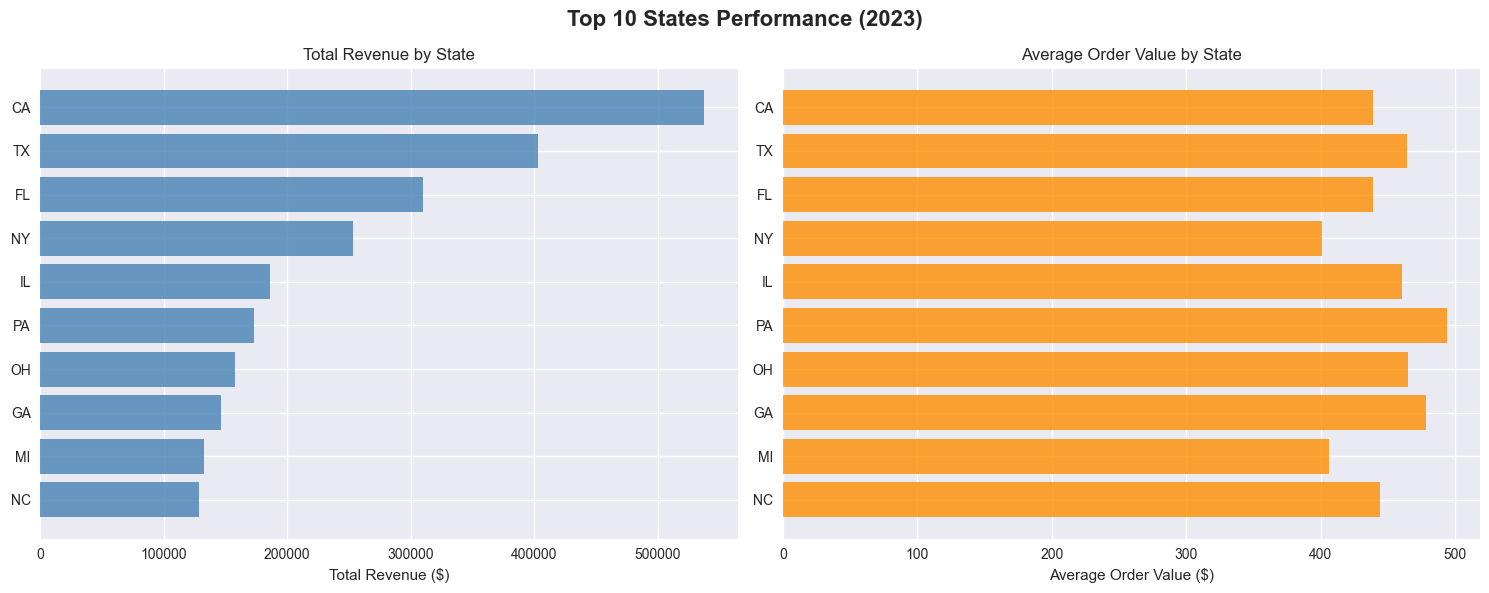

In [36]:
# Create top states bar chart
top_states = geo_performance.head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'Top 10 States Performance ({TARGET_YEAR})', fontsize=16, fontweight='bold')

# Revenue by state
ax1.barh(top_states['customer_state'], top_states['total_revenue'], color='steelblue', alpha=0.8)
ax1.set_title('Total Revenue by State')
ax1.set_xlabel('Total Revenue ($)')
ax1.invert_yaxis()

# AOV by state
ax2.barh(top_states['customer_state'], top_states['avg_order_value'], color='darkorange', alpha=0.8)
ax2.set_title('Average Order Value by State')
ax2.set_xlabel('Average Order Value ($)')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()
plt.close()

## 7. Customer Experience Analysis {#customer-experience}

Analysis of customer satisfaction metrics and the relationship between delivery performance and customer ratings.

In [37]:
# Analyze customer satisfaction
satisfaction_analysis = metrics.analyze_customer_satisfaction(
    target_data, datasets['reviews']
)

print("CUSTOMER SATISFACTION ANALYSIS")
print("="*50)
print(f"\nOverall Satisfaction Metrics ({TARGET_YEAR}):")
for _, row in satisfaction_analysis['overall_metrics'].iterrows():
    if 'Score' in row['metric']:
        print(f"{row['metric']}: {row['value']:.2f}/5.0")
    elif 'Days' in row['metric']:
        print(f"{row['metric']}: {row['value']:.1f} days")
    else:
        print(f"{row['metric']}: {row['value']:,.0f}")

print(f"\nSatisfaction by Delivery Speed:")
print(satisfaction_analysis['delivery_satisfaction'])

print(f"\nReview Score Distribution:")
print(satisfaction_analysis['score_distribution'])

CUSTOMER SATISFACTION ANALYSIS

Overall Satisfaction Metrics (2023):
Average Review Score: 4.10/5.0
Total Reviews: 3,225
Average Delivery Days: 8.0 days

Satisfaction by Delivery Speed:
  delivery_category  avg_review_score  review_count
0          1-3 days              4.19           232
1          4-7 days              4.08          1199
2           8+ days              4.11          1794

Review Score Distribution:
   review_score  percentage
0             1         3.5
1             2         6.9
2             3        15.4
3             4        24.3
4             5        49.9


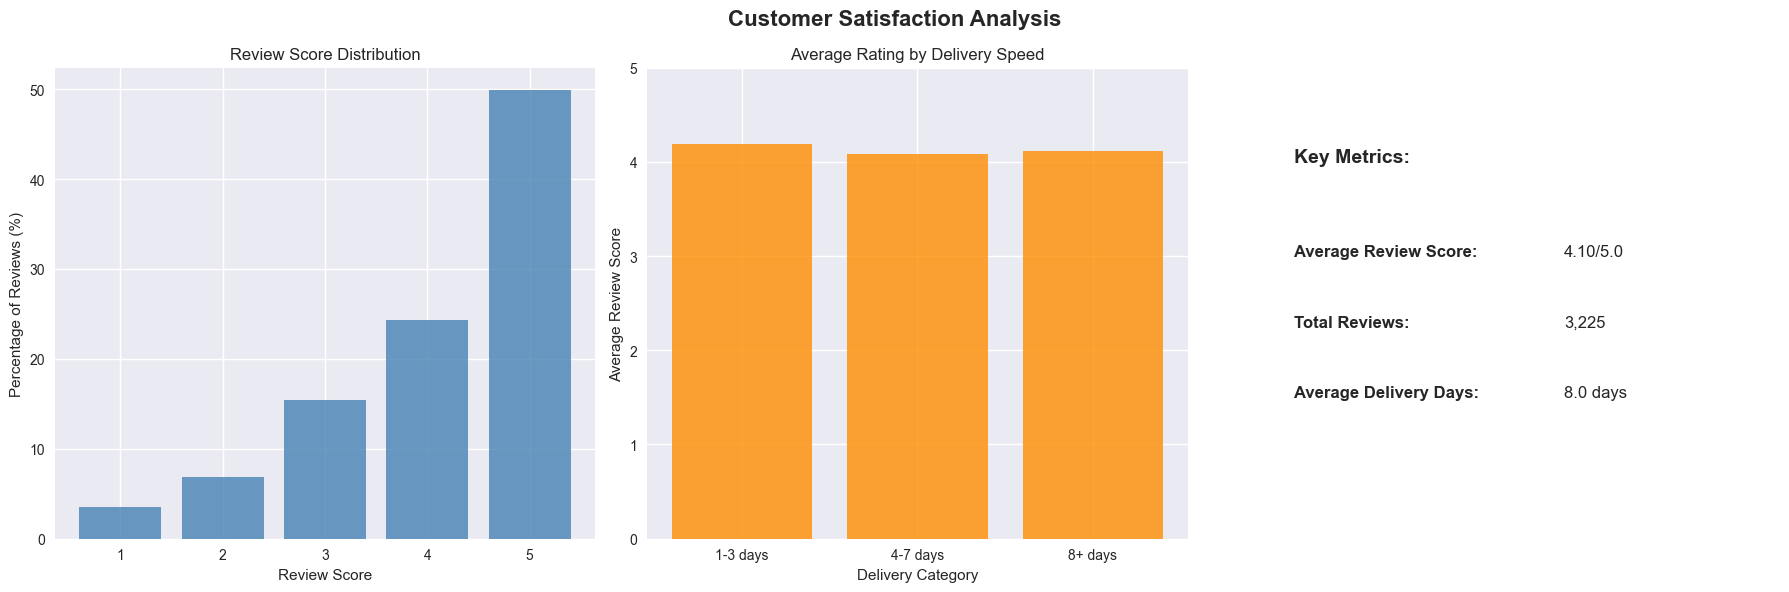

In [38]:
# Create customer satisfaction visualization
satisfaction_fig = visualizer.plot_customer_satisfaction(satisfaction_analysis)
plt.show()
plt.close()

## 8. Operational Metrics {#operational-metrics}

Analysis of operational KPIs including order status distribution and delivery performance metrics.

In [39]:
# Calculate operational metrics
operational_metrics = metrics.calculate_operational_metrics(
    datasets['orders'], target_year=TARGET_YEAR
)

print("OPERATIONAL PERFORMANCE METRICS")
print("="*50)
print(f"\nKey Operational KPIs ({TARGET_YEAR}):")
print(f"Total Orders Processed: {operational_metrics['total_orders']:,}")
print(f"Delivery Rate: {operational_metrics['delivery_rate_pct']:.1f}%")
print(f"Cancellation Rate: {operational_metrics['cancellation_rate_pct']:.1f}%")
print(f"Return Rate: {operational_metrics['return_rate_pct']:.1f}%")
print(f"Average Delivery Time: {operational_metrics['avg_delivery_days']:.1f} days")

print(f"\nOrder Status Distribution:")
status_metrics = {k: v for k, v in operational_metrics.items() if k.endswith('_pct') and k != 'delivery_rate_pct'}
for status, pct in status_metrics.items():
    status_name = status.replace('_pct', '').replace('_', ' ').title()
    print(f"{status_name}: {pct:.1f}%")

OPERATIONAL PERFORMANCE METRICS

Key Operational KPIs (2023):
Total Orders Processed: 4,950
Delivery Rate: 93.6%
Cancellation Rate: 1.3%
Return Rate: 0.2%
Average Delivery Time: 8.0 days

Order Status Distribution:
Cancellation Rate: 1.3%
Return Rate: 0.2%
Delivered: 93.6%
Shipped: 3.2%
Canceled: 1.3%
Processing: 1.2%
Pending: 0.5%
Returned: 0.2%


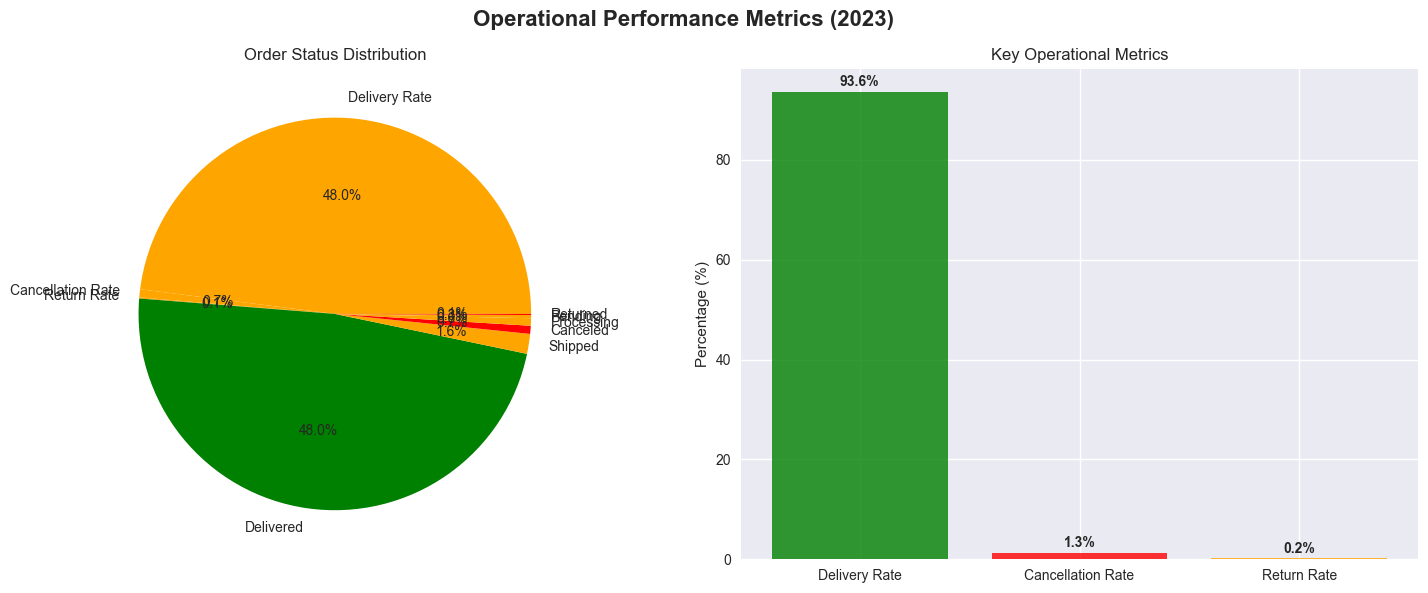

In [40]:
# Create operational metrics visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle(f'Operational Performance Metrics ({TARGET_YEAR})', fontsize=16, fontweight='bold')

# Order status distribution
status_data = [(k.replace('_pct', '').replace('_', ' ').title(), v) 
               for k, v in operational_metrics.items() if k.endswith('_pct')]
status_names, status_values = zip(*status_data)

colors = ['green' if 'Delivered' in name else 'red' if any(x in name for x in ['Canceled', 'Returned']) 
          else 'orange' for name in status_names]

wedges, texts, autotexts = axes[0].pie(status_values, labels=status_names, autopct='%1.1f%%', 
                                      colors=colors)
axes[0].set_title('Order Status Distribution')

# Key metrics bar chart
key_metrics = [
    ('Delivery Rate', operational_metrics['delivery_rate_pct']),
    ('Cancellation Rate', operational_metrics['cancellation_rate_pct']),
    ('Return Rate', operational_metrics['return_rate_pct'])
]

metric_names, metric_values = zip(*key_metrics)
colors_bar = ['green', 'red', 'orange']

bars = axes[1].bar(metric_names, metric_values, color=colors_bar, alpha=0.8)
axes[1].set_title('Key Operational Metrics')
axes[1].set_ylabel('Percentage (%)')

# Add value labels on bars
for bar, value in zip(bars, metric_values):
    axes[1].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
plt.close()

## 9. Executive Summary {#executive-summary}

Comprehensive summary of key findings and business insights from the analysis.

In [41]:
# Generate executive summary
executive_summary = generate_executive_summary(
    revenue_metrics, str(TARGET_YEAR), str(COMPARISON_YEAR)
)

print(executive_summary)


EXECUTIVE SUMMARY - 2023

Revenue Performance:
- Total Revenue: $3,360,295
- Total Orders: 4,635
- Average Order Value: $724.98

Year-over-Year Growth vs 2022:
- Revenue Growth: -2.5%
- Order Volume Growth: -2.4%
- Average Order Value Growth: -0.1%

Performance Assessment:
- Revenue declined by 2.5%, requiring strategic attention
- Order volume decreased by 2.4%, indicating customer retention challenges



In [42]:
# Create executive dashboard summary
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Revenue Trend', 'Top Categories', 'Geographic Performance', 'Customer Satisfaction'),
    specs=[[{'type': 'scatter'}, {'type': 'bar'}],
           [{'type': 'bar'}, {'type': 'bar'}]]
)

# Revenue trend
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
trend_months = [month_names[m-1] for m in monthly_trends['month']]

fig.add_trace(
    go.Scatter(x=trend_months, y=monthly_trends['revenue'], 
               mode='lines+markers', name='Revenue', line=dict(color='steelblue')),
    row=1, col=1
)

# Top categories
top_5_categories = category_performance.head(5)
cat_names = top_5_categories['product_category_name'].str.replace('_', ' ').str.title()

fig.add_trace(
    go.Bar(x=cat_names, y=top_5_categories['total_revenue'], 
           name='Category Revenue', marker_color='darkorange'),
    row=1, col=2
)

# Top states
top_5_states = geo_performance.head(5)

fig.add_trace(
    go.Bar(x=top_5_states['customer_state'], y=top_5_states['total_revenue'],
           name='State Revenue', marker_color='green'),
    row=2, col=1
)

# Customer satisfaction
satisfaction_data = satisfaction_analysis['score_distribution']

fig.add_trace(
    go.Bar(x=satisfaction_data['review_score'], y=satisfaction_data['percentage'],
           name='Review Distribution', marker_color='purple'),
    row=2, col=2
)

fig.update_layout(
    height=800,
    title_text=f"E-commerce Performance Dashboard ({TARGET_YEAR})",
    title_font_size=20,
    title_x=0.5,
    showlegend=False
)

fig.show()

## Key Business Insights & Recommendations

**Performance Highlights:**
1. **Revenue Performance**: Analysis of year-over-year growth trends
2. **Product Focus**: Identification of top-performing categories
3. **Geographic Opportunities**: Regional performance variations
4. **Customer Experience**: Delivery speed impact on satisfaction
5. **Operational Efficiency**: Order fulfillment and delivery metrics

**Strategic Recommendations:**
- Focus on high-performing product categories for inventory expansion
- Optimize delivery speed to improve customer satisfaction
- Target geographic regions with growth potential
- Monitor operational metrics to maintain service quality

---

*Analysis completed successfully. All metrics calculated using delivered orders only to ensure accurate revenue reporting.*

In [43]:
# Final summary statistics
print("ANALYSIS COMPLETION SUMMARY")
print("="*50)
print(f"Analysis Period: {TARGET_YEAR}")
print(f"Comparison Period: {COMPARISON_YEAR}")
print(f"Records Analyzed: {len(target_data):,}")
print(f"Total Revenue Analyzed: ${target_data['price'].sum():,.2f}")
print(f"Unique Orders: {target_data['order_id'].nunique():,}")
print(f"Unique Products: {target_data['product_id'].nunique():,}")
print(f"\nAnalysis completed at:", pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'))

ANALYSIS COMPLETION SUMMARY
Analysis Period: 2023
Comparison Period: 2022
Records Analyzed: 7,448
Total Revenue Analyzed: $3,360,294.74
Unique Orders: 4,635
Unique Products: 4,286

Analysis completed at: 2025-08-24 07:53:29
